Numerical Methods Mid term Paper 

Mussa Nadir Jan FA19-BSM-007 

# Question #1 

Convert the following algorithms into python by using functions and then solve the following problem

Find the roots of the following equation

$2x^2 - 5x + 3 = 0$  analytical roots are $x = 1.5,1$

the root is 1.500 at 6 iterations.


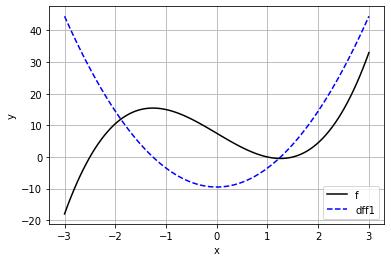

In [64]:
from math import sin,cos    
def newton(fn,dfn,x,tol,max):  
    for i in range(max):   
        xn = x - fn(x)/dfn(x)
        if abs(xn-x)<tol:                          
            break 
        x = xn   
    return xn, i

f = lambda x: 2*x**3-9.5*x+7.5    
dff = lambda x : 6*x**2-9.5    

x, n = newton(f, dff, 3, 0.0001, 100) 
print('the root is %.3f at %d iterations.'%(x,n))
#plot
x = np.linspace(-3,3,100)

plt.plot(x,f(x),'-k',x,dff(x),'--b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["f","dff1"])
plt.grid()

## Algorithm 1 (Secant Method)

1. Input two values for $x_1$ and $x_2$
2. Calculate $x_{new} = x_2 - \frac{x_2-x_1}{f(x_2)-f(x_1)}f(x_2)$
3. If $|x_{new} - x_2| < tolerance$ , output $x_{new}$ the root and stop
4. If number of iterations reaches the maximum, stop.
5. Else let $x_1=x_2$ and $x_2=x_{new}$
6. Repeat the steps from 2

enter x1: 1.2
enter x2: 1.7
Root = 1.500000 at 7 iterations


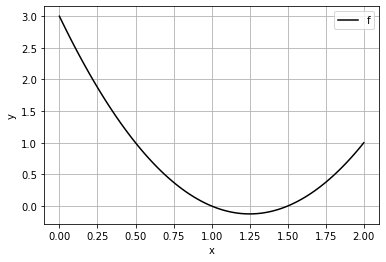

In [45]:
from math import sin     
def secant(fn,x1,x2,tol,maxiter):   
    for i in range(maxiter):   
     
        xnew  = x2 - (x2-x1)/(fn(x2)-fn(x1))*fn(x2)    
        if abs(xnew-x2) < tol:    
            break    
        else:
            x1 = x2  
            x2 = xnew  
    else:
        print('warning: Maximum number of iterations is reached')
    return xnew, i   

f = lambda x: 2*x**2 - 5*x + 3 

x1 = float(input('enter x1: '))  
x2 = float(input('enter x2: '))    

r, n = secant(f,x1,x2,1.0e-6,100)   
x = np.linspace(-0,2,100)
print('Root = %f at %d iterations'%(r,n))
#plot
plt.plot(x,f(x),'-k')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["f"])
plt.grid()

## Algorithm 2 (Newton's Methd)


1. Find $f'(x)$ and define newton's raphson equation
2. Guess an initial value of x for the first iteration
3. substitute x in the NR equation and calculate $x^*$
4. if $|x^*-x|<tolerance$, stop iterations and output the root: $x^*$
5. if the number of interations reaches an assumed maximum, stop.
6. else let $x=x^*$ and repeat the steps from 3 until a condition in 4 or 5 is satisfied.

# Question # 2

Plot the first derivative of the following function over $[-1,1]$ by using the forward, backward and central differences.

Compare the plots with the theoretical one at $h = 0.1, 0.01$ and $0.001$

$f(x) = 0.1x^5 - 0.2x^3 + 0.1x - 0.2$

Theoretical :

$f'(x) = 0.5x^4 - 0.6x^2 + 0.1$

**Formulas are given for reference**

**FORWARD FINITE DIFFERENCES**

$f'(x) = \frac{f(x_{i+1})-f(x_i)}{h}$

$f''(x) = \frac{f(x_{i+2})-2f(x_{i+1})+f(x_i)}{h^2}$

**BACKWARD FINITE DIFFERENCES**

$f'(x) = \frac{f(x_{i}-f(x_i))}{h}$

$f''(x) = \frac{f(x_{i})-2f(x_{i-1})+f(x_{i-2})}{h^2}$

**CENTRAL FINITE DIFFERENCES**

$f'(x) = \frac{f(x_{i+1})-f(x_{i-1})}{2h}$

$f''(x) = \frac{f(x_{i+1})-2f(x_i)+f(x_{i-1})}{h^2}$


	 f'(x)		 err		 f''(x)		 err
FFD	 0.086310	-0.007740	-0.222000	-0.104000
BFD	 0.098010	 0.003960	 0.000000	 0.118000
CFD	 0.092160	-0.001890	-0.117000	 0.001000


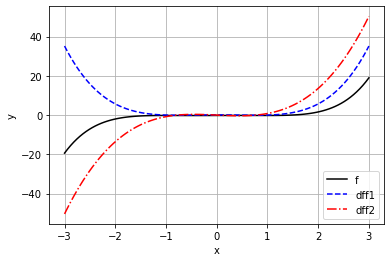

In [42]:
f=lambda x: 0.1*x**5 - 0.2*x**3 + 0.1*x - 0.2
x = 0.1
h = 0.1
df1 = 0.09405
df2 = -0.118
print("\t f'(x)\t\t err\t\t f''(x)\t\t err")
dff1 = (f(x+h)-f(x))/h
dff2 = (f(x+2*h)-2*f(x+h)+f(x))/h**2
print("FFD\t% f\t% f\t% f\t% f"%(dff1,dff1-df1,dff2,dff2-df2))
dff1 = (f(x)-f(x-h))/h
dff2 = (f(x)-2*f(x-h)+f(x-2*h))/h**2
print("BFD\t% f\t% f\t% f\t% f"%(dff1,dff1-df1,dff2,dff2-df2))
dff1 = (f(x+h)-f(x-h))/(2*h)
dff2 = (f(x+h)-2*f(x)+f(x-h))/h**2
print("CFD\t% f\t% f\t% f\t% f"%(dff1,dff1-df1,dff2,dff2-df2))
import numpy as np
import matplotlib.pyplot as plt

f=lambda x: 0.1*x**5 - 0.2*x**3 + 0.1*x - 0.2
h = 0.01
x = np.linspace(-3,3,100)

dff1 = (f(x+h)-f(x-h))/(2*h)
dff2 = (f(x+h)-2*f(x)+f(x-h))/h**2

#plot
plt.plot(x,f(x),'-k',x,dff1,'--b',x,dff2,'-.r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(["f","dff1","dff2"])
plt.grid()